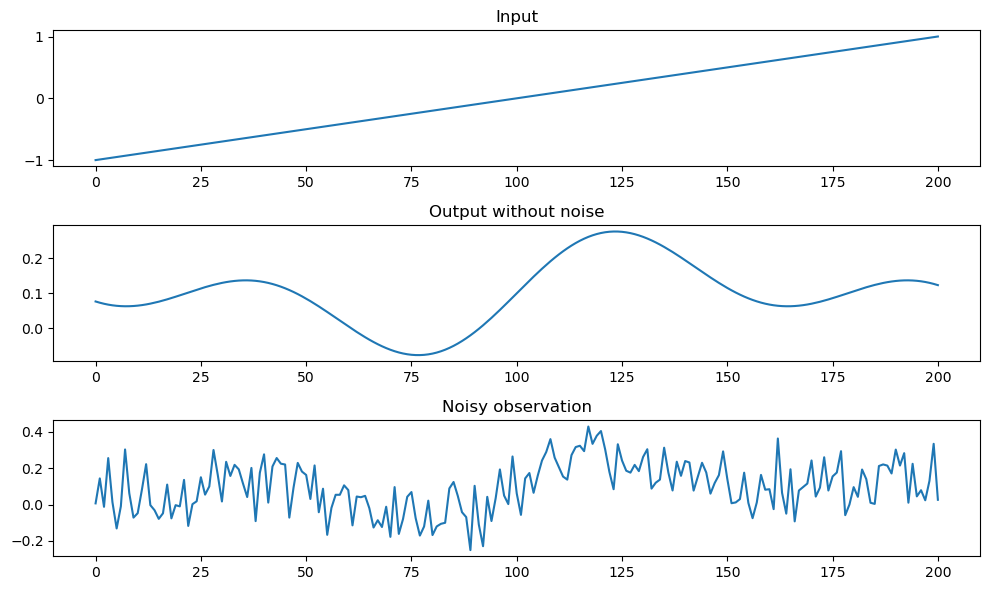

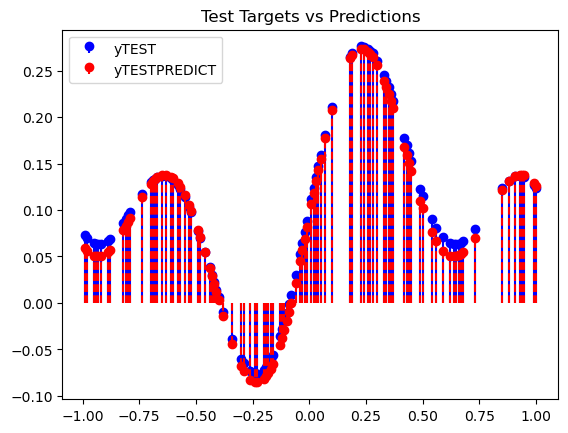

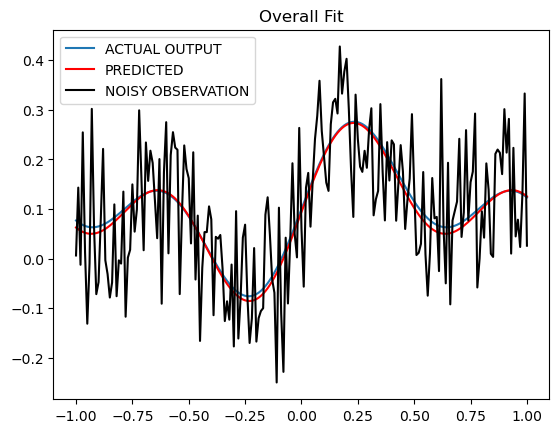

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generation of physically observed Noisy data centered around an expected trigonometric relationship
x = np.arange(-1, 1.01, 0.01)
y = 0.1 * np.sin(8 * x) + 0.1 * np.sin(4 * x) + 0.1
t = y + np.random.randn(len(x)) * 0.1

# Input, noiseless output, noisy target
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(x)
plt.title("Input")

plt.subplot(3, 1, 2)
plt.plot(y)
plt.title("Output without noise")

plt.subplot(3, 1, 3)
plt.plot(t)
plt.title("Noisy observation")
plt.tight_layout()
plt.savefig("figure1_trig.png")

# Splitting of dataset into Training and Testing data
L = len(x)
indices = np.random.permutation(L)
TRAINPOS = indices[:L // 2]
TESTPOS = indices[L // 2:]

xTRAIN = x[TRAINPOS]
tTRAIN = t[TRAINPOS]
xTEST = x[TESTPOS]
yTEST = y[TESTPOS]

# Construction of Trigonometric model(PHI(design) matrix) of input variable using sine basis
phi1 = np.sin(8 * xTRAIN)
phi2 = np.sin(4 * xTRAIN)
PHI = np.vstack((np.ones_like(xTRAIN), phi1, phi2)).T

# Least squares solution
w = np.linalg.pinv(PHI.T @ PHI) @ PHI.T @ tTRAIN

# Prediction on test data
phi1_test = np.sin(8 * xTEST)
phi2_test = np.sin(4 * xTEST)
yTESTPREDICT = w[0] + w[1] * phi1_test + w[2] * phi2_test

# Plotting test prediction
plt.figure()
plt.stem(xTEST, yTEST, linefmt='b-', markerfmt='bo', basefmt=' ')
plt.stem(xTEST, yTESTPREDICT, linefmt='r--', markerfmt='ro', basefmt=' ')
plt.legend(['yTEST', 'yTESTPREDICT'])
plt.title("Test Targets vs Predictions")
plt.savefig("figure2_trig.png")

# Full prediction on entire dataset
phi1_full = np.sin(8 * x)
phi2_full = np.sin(4 * x)
yPREDICT = w[0] + w[1] * phi1_full + w[2] * phi2_full

plt.figure()
plt.plot(x, y, label='ACTUAL OUTPUT')
plt.plot(x, yPREDICT, 'r', label='PREDICTED')
plt.plot(x, t, 'k', label='NOISY OBSERVATION')
plt.legend()
plt.title("Overall Fit")
plt.savefig("figure3_trig.png")